# fxデータ読み込み

In [13]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('./module')
from utils import cum_std, log_diff, log_diff_inv, load_fx_data
from kalman_filters import LinearKalmanFilter as LKF
from kalman_filters import ExtendedKalmanFilter as EnKF


np.random.seed(0)

In [14]:
instrument_list = ['USD_JPY', 'GBP_JPY', 'EUR_JPY']

df_dict_train = load_fx_data(instrument_list, data_kind='train')
df_dict_test = load_fx_data(instrument_list, data_kind='test')

df_dict_train['EUR_JPY']

,Open_ask,High_ask,Low_ask,Close_ask,Volume,Open_bid,High_bid,Low_bid,Close_bid
Time,,,,,,,,,
2014-01-01 22:00:00+00:00,144.926,145.163,142.859,143.366,143014,144.776,145.108,142.838,143.228
2014-01-02 22:00:00+00:00,143.387,143.387,141.975,142.527,113868,143.237,143.306,141.951,142.412
2014-01-05 22:00:00+00:00,142.515,142.793,141.512,142.080,125100,142.464,142.775,141.491,142.007
2014-01-06 22:00:00+00:00,142.080,142.600,141.951,142.449,115303,142.006,142.584,141.930,142.377
2014-01-07 22:00:00+00:00,142.449,143.184,142.130,142.405,128572,142.380,143.161,142.109,142.316
...,...,...,...,...,...,...,...,...,...
2018-12-03 22:00:00+00:00,129.037,129.065,127.632,127.951,26900,128.927,129.019,127.613,127.901
2018-12-04 22:00:00+00:00,127.989,128.502,127.801,128.439,16113,127.939,128.483,127.782,128.389
2018-12-05 22:00:00+00:00,128.433,128.468,127.683,128.214,37536,128.383,128.418,127.663,128.164


In [15]:
df_dict_log_train = {}
for instrument in df_dict_train.keys():
    df_stable = df_dict_train[instrument].copy()
    for column in df_stable.columns:
        df_stable[column] = log_diff(df_stable[column].values)
    df_dict_log_train[instrument] = df_stable

df_dict_log_test = {}
for instrument in df_dict_test.keys():
    df_stable = df_dict_test[instrument].copy()
    for column in df_stable.columns:
        df_stable[column] = log_diff(df_stable[column].values)
    df_dict_log_test[instrument] = df_stable
df_dict_log_test['USD_JPY']

,Open_ask,High_ask,Low_ask,Close_ask,Volume,Open_bid,High_bid,Low_bid,Close_bid
Time,,,,,,,,,
2019-01-01 22:00:00+00:00,4.697202,4.698077,4.688748,4.690770,10.333840,4.696290,4.697913,4.688610,4.689851
2019-01-02 22:00:00+00:00,-0.006983,-0.007051,-0.036036,-0.011504,0.714029,-0.006365,-0.007722,-0.036852,-0.011115
2019-01-03 22:00:00+00:00,-0.010860,-0.003374,0.024993,0.008092,-0.247968,-0.011105,-0.002676,0.025807,0.007700
2019-01-06 22:00:00+00:00,0.008009,0.001463,0.004713,0.001519,-0.551655,0.007690,0.001454,0.004705,0.002155
2019-01-07 22:00:00+00:00,0.001509,0.003112,0.003880,0.000202,-0.053060,0.002081,0.003140,0.003779,0.000101
...,...,...,...,...,...,...,...,...,...
2019-12-23 22:00:00+00:00,-0.000740,-0.000858,-0.000110,0.000155,0.233195,-0.000421,-0.000895,-0.000110,-0.000055
2019-12-25 22:00:00+00:00,0.000018,0.002199,0.000329,0.002355,-0.409228,0.000000,0.002218,-0.000073,0.002055
2019-12-26 22:00:00+00:00,0.001972,-0.000365,0.000229,-0.001697,1.101224,0.001672,-0.000821,0.000640,-0.001699


In [16]:
train = df_dict_log_train['USD_JPY']['Close_ask'].values[1:]
test = df_dict_log_test['USD_JPY']['Close_ask'].values[1:]
print(train.shape, test.shape)

std_train = train.std()
print(std_train)

(1297,) (274,)
0.0055667933091987625


In [17]:
# 参考までに現在の値を明日の予測値とする場合の誤差
np.std(train[1:]-train[:-1])

0.007863241514206873

# ARMAモデルの作成

In [18]:
def generate_state_data(F, G, q, x_0, size):
    """
    モデルノイズは1次元を仮定
    """
    data = np.zeros((size, len(x_0)))
    x = x_0
    data[0] = x
    for i in range(1, size):
        x = F@x + G@np.random.normal(loc=0, scale=q, size=(1,))
        data[i] = x
    return data

def generate_obs_data(H, r, series, noise=True):
    """
    観測ノイズは1次元を仮定
    """
    obs = (H@series.T).T
    if noise:
        obs += np.random.normal(loc=0, scale=r, size=(len(series),1))
    return obs

In [19]:
# ARモデル
p = 5
a = -1*np.ones(p).reshape(p, 1)

# MAモデル
q = 3
b = np.zeros(3)
# b = np.array([0.5, 0.5, 0.5])

N = max([p,q+1])
print(f'p = {p}, q = {q}, N = {N}')

# a, bを0拡張
if N > p:
    a_N = np.vstack([a, np.zeros(N-p)])
else:
    a_N = a

if N > q+1:
    b_N = np.hstack([b, np.zeros(N-q-1)])
else:
    b_N = b

# 状態遷移行列 (N, N)
F = np.block([a_N, np.vstack([np.eye(N-1), np.zeros((1, N-1))])])
print(f'F = \n{F}')

# ノイズ重み (N, 1), b_0=1を含む． 
G = np.array([1, *b_N]).reshape(N, 1)
print(f'G = \n{G}')

# 観測モデル (1, N)
H = np.block([1, np.zeros((1, N-1))])
print(f'H_ma = \n{H}')

# ノイズ
sigma_train = train.std()

# モデルノイズstd
sigma_m = sigma_train/np.sqrt(2)
Q = np.array([sigma_m])
# 観測ノイズstd
sigma_o = sigma_train/np.sqrt(2)
r = sigma_o
R = np.array([r])

p = 5, q = 3, N = 5
F = 
[[-1.  1.  0.  0.  0.]
 [-1.  0.  1.  0.  0.]
 [-1.  0.  0.  1.  0.]
 [-1.  0.  0.  0.  1.]
 [-1.  0.  0.  0.  0.]]
G = 
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]]
H_ma = 
[[1. 0. 0. 0. 0.]]


## LKF


In [20]:
y = train
x_0 = np.random.choice(train, N)
P_0 = 10*np.eye(N)

In [21]:
# 推定
lkf = LKF(F, H, G, Q, R, y, x_0, P_0, alpha=1., storing_forecast=True)
lkf.forward_estimation()
estimate_data = (H@(np.array(lkf.x)).T).T
step_f_data = (H@(np.array(lkf.x_f_history)).T).T

### plot

In [49]:
def nrmse(true, esti, nomalize_std):
    return np.linalg.norm(true-esti, ord=2)/np.sqrt(len(true))/nomalize_std

nrmse: 0.3998723635544815


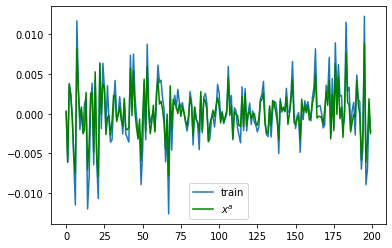

In [50]:
end = 200
plt.plot(train[:end], '-', label='train')
plt.plot(estimate_data[:end], 'g-', label='$x^a$')
plt.legend()

print(f'nrmse: {nrmse(train, estimate_data.reshape(-1,), std_train)}')

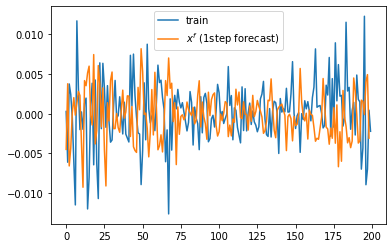

In [51]:
plt.plot(train[:end], '-', label='train')
plt.plot(step_f_data[:end], '-',label='$x^f$ (1step forecast)')
plt.legend()

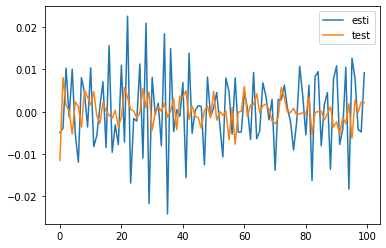

In [25]:
# lkfによるtest予測失敗 2021/01/09
end = 100
esti = generate_state_data(F, G, Q[0], lkf.x[-1], end)
obs_esti_data = generate_obs_data(H, R[0], esti, noise=False)
plt.plot(obs_esti_data, label='esti')
plt.plot(test[:end], label='test')
plt.legend()

## EnKFで同時にパラメータ推定

In [26]:
# パラメータ推定モデル
# given N
# 自己回帰パラメータaを推定する．

def F_a(a):
    """
    args:
        a: np.ndarray(N,1)
    """
    return np.block([a.reshape(N, 1), np.vstack([np.eye(N-1), np.zeros((1, N-1))])])

# def G_b(b):
#     """
#     args:
#         b: np.ndarray(N-1,)
#     """
#     return np.array([1, *b]).reshape(N, 1)

# 非線形モデル
def M(X, dt):
    """
    args:
        X: np.ndarray(2N,)
            X = (x, a)
        dt: float
    """
    return np.hstack([F_a(X[N:])@X[:N], X[N:]])

# G,Hのサイズを拡張
H_params = np.block([1, np.zeros((1, 2*N-1))])
G_params = np.vstack([G, np.zeros((N,1))])

In [27]:
# 推定
y = train
x_0 = np.random.choice(train, N)
a_0 = a_N
X_0 = np.hstack([x_0, a_N.reshape(-1,)])
P_0 = 10*np.eye(2*N)
enkf = EnKF(M, H_params, G_params, Q, R, y, X_0, P_0, alpha=1., storing_forecast=True)
enkf.forward_estimation()
enkf_estimate_data = (H_params@(np.array(enkf.x)).T).T
enkf_step_f_data = (H_params@(np.array(enkf.x_f_history)).T).T

### plot

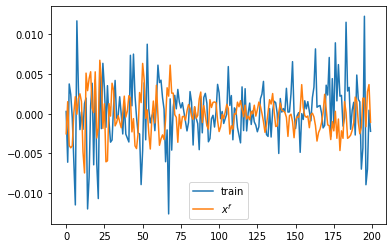

In [28]:
# 1stepごとに予測(x_f)
end = 200
plt.plot(train[:end], label='train')
# plt.plot(enkf_estimate_data[:end], label='$x^a$')
plt.plot(enkf_step_f_data[:end], label='$x^f$')
plt.legend()

std: 0.005350314772884394


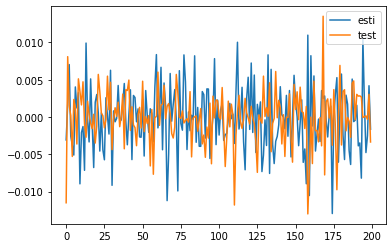

In [29]:
# 推定後パラメータによるARモデルでtestを予測
# end = 200
a_esti = enkf.x[-1][N:]
esti = generate_state_data(F_a(a_esti), G, Q[0], enkf.x[-1][:N], len(test))
obs_esti_data = generate_obs_data(H, R[0], esti, noise=False)
plt.plot(obs_esti_data[:end], label='esti')
plt.plot(test[:end], label='test')
plt.legend()

print(f'std: {np.std(obs_esti_data.reshape(-1,)-test)}')

array([0.31213919, 0.24125938, 0.18709722, 0.10573766, 0.15605439])

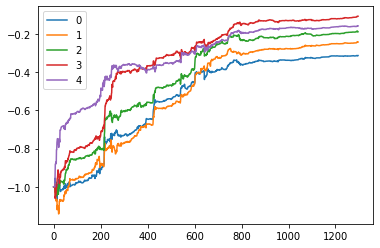

In [30]:
# 自己回帰パラメータの推定結果
for n in range(N):
    plt.plot(np.array(enkf.x)[:, N+n], label=n)
plt.legend()
np.abs(np.array(enkf.x)[-1, N:])

## 2021/01/09まとめ
ARMA(5,0)を使って２つの長期・短期の予測をした
- LKF:
    - x_aをプロットすれば適当なモデルでも誤差は小さい
    - 短期: x_fをプロットすると失敗
- EnKF:
    - フィルタリングと同時に自己回帰パラメータを推定できる．
    - 短期: x_fをプロットすると上手く推定できていない(*1step推定不可能*)
    - 長期: trainでパラメータ推定後の自己回帰パラメータを使ってARモデルを動かすことによるtestの予測は失敗
- 自己回帰係数はそれぞれで10倍の差はない
- 基準は0.007863241514206873

future:
- inflation
- 回帰係数の決定
- 移動平均
- 誤差の計算